In [85]:
from logging import WARNING, INFO
#from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm

In [86]:
run_name = '1920_rounds'
#run_name = 'param_score'
#seed = '1999'
#save_path = '../plots/NIID/dirichlet_20_1_1_2_2_1_1_20/NIID_trainset_IID_testsets/param_score/'
#file_path = 'outputs/no_pretrain/' + 'seed_' + seed + '/' + run_name #NEED TO READ ALL FILES
#root = '../outputs/NIID/dirichlet_20_1_1_2_2_1_1_20/NIID_trainset_IID_testsets/param_score/'
save_path = '../plots/NIID/dirichlet_1_1_1_20_1_1_1_40_40_1_1_1_20_1_1_1/NIID_trainset_IID_testsets/weight_avg/'
root = '../outputs/NIID/dirichlet_1_1_1_20_1_1_1_40_40_1_1_1_20_1_1_1/NIID_trainset_IID_testsets/weight_avg/'
file_path = root + run_name
num_agents = 16

In [87]:
# COMPARE WITH WEIGHT AVG
tplgys_2 = []
root_2 = '../outputs/NIID/dirichlet_1_1_1_20_1_1_1_40_40_1_1_1_20_1_1_1/NIID_trainset_IID_testsets/weight_avg/'
file_path_2 = root_2 + run_name
# Read file
file = open(file_path_2+'/0_pool.out', mode = 'r', encoding = 'utf-8-sig')
lines_2 = file.readlines()
tplgys_2.append(lines_2)
file.close()

tplgy_ID_2 = []
loss_2 = []
acc_wavg = []

for line in tplgys_2[0]:
    tplgy_ID_2.append(int(line.split(' ')[1]))
    loss_2.append(float(line.split(' ')[-3]))
    acc_wavg.append(float(line.split(' ')[-1]))
    
#print(loss_2)
#print(acc_wavg)

In [88]:
tplgys = []
raw_tplgys = []
partitions = []
# Read file
file = open(file_path+'/0_pool.out', mode = 'r', encoding = 'utf-8-sig')
lines = file.readlines()
tplgys.append(lines)
file.close()
# Read file
file = open(file_path+'/raw.out', mode = 'r', encoding = 'utf-8-sig')
r_lines = file.readlines()
raw_tplgys.append(r_lines)
file.close()
# Read file
file = open(file_path+'/partitions.out', mode = 'r', encoding = 'utf-8-sig')
p_lines = file.readlines()
partitions.append(p_lines)
file.close()

In [89]:
tplgy_ID = []
loss = []
acc = []

for line in tplgys[0]:
    tplgy_ID.append(int(line.split(' ')[1]))
    loss.append(float(line.split(' ')[-3]))
    acc.append(float(line.split(' ')[-1]))
    
#print(loss)
#print(acc)

In [90]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
#print(exec_times)

In [91]:
partitions_train = []
partitions_test = []

for elem in partitions[0][0].split(' '):
    partitions_train.append(int(elem))

for elem in partitions[0][2].split(' '):
    partitions_test.append(int(elem))

In [92]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], acc[0], '.')
# axs[0, 0].set_ylim(0, 0.8)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], acc[1], '.')
# axs[0, 1].set_ylim(0, 0.8)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], acc[2], '.')
# axs[1, 0].set_ylim(0, 0.8)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], acc[3], '.')
# axs[1, 1].set_ylim(0, 0.8)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], acc[4], '.')
# axs[2, 0].set_ylim(0, 0.8)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Acc')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_acc.pdf')

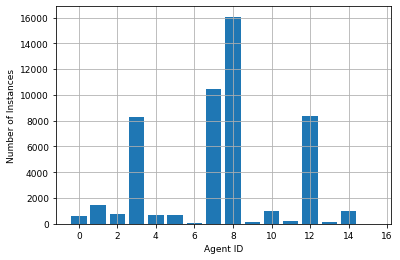

In [93]:
# PARTITIONS
agentids = np.arange(0, num_agents, 1)
plt.bar(agentids, partitions_train)
#plt.title('F1')
plt.xlabel('Agent ID')
plt.ylabel('Number of Instances')
plt.grid()
plt.savefig(save_path+run_name+'_partitions.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

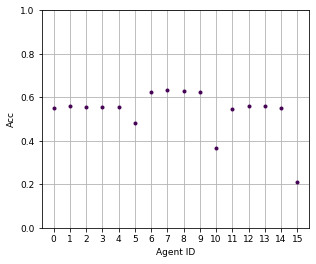

In [94]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID, acc, '.', color=viridis(0))
plt.ylim(0, 1.)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('Agent ID')
plt.ylabel('Acc')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7'], loc='upper center',shadow=True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)
plt.savefig(save_path+run_name+'_summarized_acc.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')

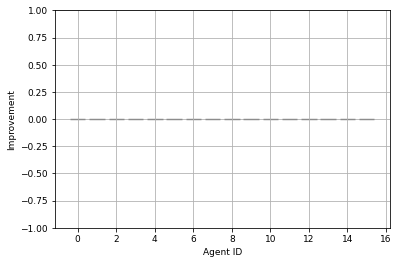

In [95]:
diff=plt.bar(np.arange(0, num_agents, 1), 
             height=np.subtract(acc,acc_wavg)/acc_wavg, edgecolor='black', 
             linewidth=1.2, color='red')#,width = 1, align = 'edge') 
plt.ylim(-1.,1.)
plt.xlabel('Agent ID')
plt.ylabel('Improvement')
plt.grid()
plt.savefig(save_path+run_name+'_improvement_param_vs_wavg.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [96]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], loss[0], '.')
# axs[0, 0].set_ylim(50, 200)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], loss[1], '.')
# axs[0, 1].set_ylim(50, 200)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], loss[2], '.')
# axs[1, 0].set_ylim(50, 200)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], loss[3], '.')
# axs[1, 1].set_ylim(50, 200)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], loss[4], '.')
# axs[2, 0].set_ylim(50, 200)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Loss')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_loss.pdf')

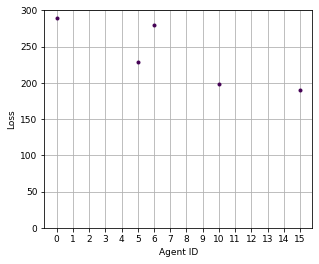

In [97]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID, loss, '.', color=viridis(0))
x = np.arange(0, num_agents, 1)
plt.xticks(x)
plt.ylim(0, 300)

#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('Agent ID')
plt.ylabel('Loss')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7'], loc='upper center', shadow = True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)

plt.savefig(save_path+run_name+'_summarized_loss.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [98]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 1920
    
tmp = raw_tplgys[0][1].split()
for i in range(1,num_rounds+1):
    loss_per_tplgy.append((float(tmp[2*i][:-1])))

In [99]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 1920
for i in range(num_agents):
    tmp_loss = []
    for j in range(i, num_rounds, num_agents):
        tmp_loss.append((loss_per_tplgy[j]))
    loss_per_tplgy_by_agent.append(tmp_loss)

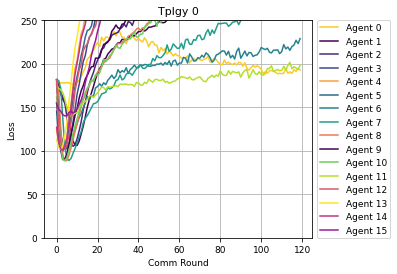

In [100]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
viridis = cm.get_cmap('viridis', 10)
plasma = cm.get_cmap('plasma', 10)
font = {'size': 9}
titles = ['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7']

for i in range(1):
    plt.rc('font', **font)
    plt.plot(loss_per_tplgy_by_agent[0], color=plasma(0.8))
    plt.plot(loss_per_tplgy_by_agent[1], color=viridis(0.))
    plt.plot(loss_per_tplgy_by_agent[2], color=viridis(0.1))
    plt.plot(loss_per_tplgy_by_agent[3], color=viridis(0.2))
    plt.plot(loss_per_tplgy_by_agent[4], color=plasma(0.7))
    plt.plot(loss_per_tplgy_by_agent[5], color=viridis(0.3))
    plt.plot(loss_per_tplgy_by_agent[6], color=viridis(0.4))
    plt.plot(loss_per_tplgy_by_agent[7], color=viridis(0.5))
    plt.plot(loss_per_tplgy_by_agent[8], color=plasma(0.6))
    plt.plot(loss_per_tplgy_by_agent[9], color=viridis(0.))
    plt.plot(loss_per_tplgy_by_agent[10], color=viridis(0.7))
    plt.plot(loss_per_tplgy_by_agent[11], color=viridis(0.8))
    plt.plot(loss_per_tplgy_by_agent[12], color=plasma(0.5))
    plt.plot(loss_per_tplgy_by_agent[13], color=viridis(0.9))
    plt.plot(loss_per_tplgy_by_agent[14], color=plasma(0.4))
    plt.plot(loss_per_tplgy_by_agent[15], color=plasma(0.3))
    plt.ylim(0, 250)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title(titles[i], fontsize=11)
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9', 'Agent 10', 'Agent 11', 'Agent 12', 'Agent 13', 'Agent 14', 'Agent 15'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
    plt.savefig(save_path + run_name+'_raw_summarized_loss.pdf')
    plt.show()


In [101]:
# font = {'size': 5}
# plt.rc('font', **font)
# 
# #VISUALIZE LOSSES PER TOPOLOGY AND AGENT
# viridis = cm.get_cmap('viridis', 10)
# plasma = cm.get_cmap('plasma', 10)
# 
# fig, axs = plt.subplots()
# fig.tight_layout()
# 
# axs.plot(loss_per_tplgy_by_agent[0][:24], color=plasma(0.8))
# axs.plot(loss_per_tplgy_by_agent[1][:24], color=viridis(0.))
# axs.plot(loss_per_tplgy_by_agent[2][:24], color=viridis(0.1))
# axs.plot(loss_per_tplgy_by_agent[3][:24], color=viridis(0.2))
# axs.plot(loss_per_tplgy_by_agent[4][:24], color=plasma(0.7))
# axs.plot(loss_per_tplgy_by_agent[5][:24], color=viridis(0.3))
# axs.plot(loss_per_tplgy_by_agent[6][:24], color=viridis(0.4))
# axs.plot(loss_per_tplgy_by_agent[7][:24], color=viridis(0.5))
# axs.plot(loss_per_tplgy_by_agent[8][:24], color=viridis(0.85))
# axs.plot(loss_per_tplgy_by_agent[9][:24], color=plasma(0.4))
# axs.grid()
# axs.set_ylim(0, 250)
# #axs[0, 0].set_xlabel('Comm Round')
# #axs[0, 0].set_ylabel('Loss')
# axs.set_title("Tplgy 0", fontsize=6)
# 
# ax = plt.gca()
# box = ax.get_position()
# #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# lgd = ax.legend(['Agent 0 - ND', 'Agent 1 - R', 'Agent 2 - R', 'Agent 3 - R', 'Agent 4 - ND', 'Agent 5 - R', 'Agent 6 - R', 'Agent 7 - R', 'Agent 8 - D', 'Agent 9 - DND'], loc='upper center', shadow = True, bbox_to_anchor=(-0.15, -0.15), ncol = 5, fancybox= True)
# 
# plt.savefig(save_path+run_name+'_top_loss.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()

In [102]:
# '''Visualize acc average per pool and comm round'''
# 
# acc1 = []
# for accuracies in acc_distr:
#     acc2 = []
#     for acc in accuracies:
#         res = []
#         for idx in acc.split(' '):
#             f_idx = float(idx)
#             if f_idx == 1.0:
#                 f_idx = 0.0
#             res.append(f_idx)
#         #res = [float(idx) for idx in acc.split(' ')]
#         if res == 1.0:
#             res = 0.0
#         acc2.append(np.average(res))
#     acc1.append(acc2)

In [103]:
# '''Create sets with exec times'''
# acc_per_nodes = []
# for i in range(num_agents):
#     tmp_tplgy = []
#     for j in range(5):
#         tmp_tplgy.append(acc1[j][i::10])
#     acc_per_nodes.append(tmp_tplgy)

In [104]:
# viridis = cm.get_cmap('viridis', 10)
# font = {'size': 9}
# for node in range(num_agents):
#     plt.rc('font', **font)
#     for i in range(5):
#         plt.plot(acc_per_nodes[node][i], color=viridis(0.1 * 2.*i))
#     #x = np.arange(0, num_rounds, 1)
#     #plt.xticks(x)
#     plt.ylim(0.0, 1.0)
#     plt.title('Node ' + str(node))
#     plt.xlabel('Comm Round')
#     plt.ylabel('Acc')
#     plt.grid()
# 
#     ax = plt.gca()
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.savefig(save_path+'node'+ str(node) +'_distr_val_acc.pdf')
#     plt.show()

In [105]:
# '''Visualize Exec times per topology'''
# font = {'size': 9}
# plt.rc('font', **font)
# x = [0, 2, 4, 6, 7]
# plt.plot(x, exec_times, '.')
# plt.xticks(x)
# plt.title("Exec times " + run_name)
# plt.xlabel("tplgy")
# plt.ylabel("mins")
# plt.grid()
# plt.savefig(save_path+run_name+'_exec_times.pdf')
# plt.show()